In [7]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [8]:
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [62]:
df_US = df[df['job_country']=='United States'].copy()
df_skills = df_US.explode('job_skills')
df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [63]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [ ]:
df_skills_count = df_skills.groupby(['job_title_short','job_skills']).size().reset_index(name='skill_count')
# df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size().reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [65]:
df_skills_perc = pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')
df_skills_perc['percent'] = df_skills_perc['skill_count']/df_skills_perc['jobs_total']*100
df_skills_perc.head()

,job_title_short,job_skills,skill_count,jobs_total,percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534


In [ ]:
job_count = df['job_title_short'].value_counts().sort_values(ascending=False).reset_index(name='job_count').head(3)
job_titles = job_count['job_title_short'].to_list()
# len(job_titles)


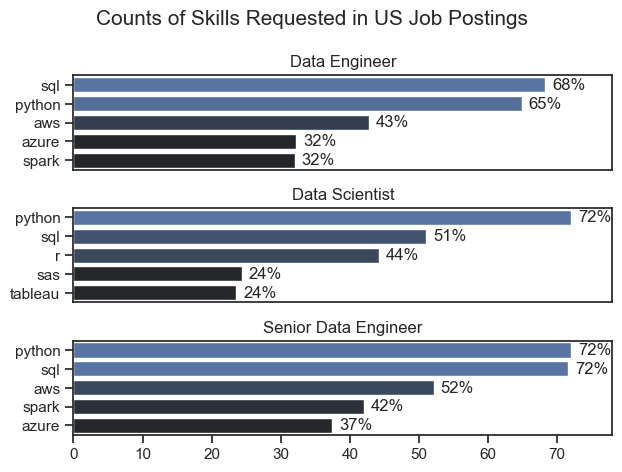

In [68]:
job_titles = df_skills['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[0:3])
# job_titles

sns.set_theme(style='ticks')
fig, ax = plt.subplots(len(job_titles),1)   

for i,job in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']==job].head()
    sns.barplot(data=df_plot,x='percent',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b',legend=False)  
    
    # sns.despine()
    ax[i].set_title(f'{job}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,78)

    if i != len(job_titles)-1:
        ax[i].set_xticks([])

    for n,v in enumerate(df_plot['percent']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')


fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout()
plt.show()